# QUBO statistics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import statistics
from graphs import DrawSolution, NetworkToFile, FileToNetwork
from graphs import DrawNetwork, GraphPartitioning, RandomGraphGenerator

In [3]:
from QUBO import QMatrix, QUBOSolution, CheckIfEqual
from QUBO import NumberCutEdges, IsConnected, IsBalanced

We will randomly generate 20 graphs of 10 nodes using Erdös-Rényi model for different values of p. Then, we will solve the GP problem using the QUBO model for each graph and study different parameters.

In [13]:
#Parameters
n = 10
p_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
alpha = 1.25
beta = 1

In [14]:
#Solving the problem
Egap_list = []
cut_edges_list = []
edges_list = []
average_list1 = []
deviations_list1 = []
average_list2 = []
deviations_list2 = []


for i in p_values:
    Egap_list.append([])
    cut_edges_list.append([])
    
pos = 0
for p in p_values:
    for i in range(20):
        G = RandomGraphGenerator(n, p)
        NetworkToFile(G, "graph-"+ str(i+1) + "-" + str(p) + ".txt")
        Q =QMatrix("graph-"+ str(i+1) + "-" + str(p) + ".txt", alpha, beta)
        num_sols, xmin, Egap = QUBOSolution(Q, 1e-2)
        
        aux = []
        for vect in xmin:
            aux.append(NumberCutEdges(vect, G))
        cut_edge_min = np.amin(aux)
        
        Egap_list[pos].append(Egap)
        cut_edges_list[pos].append(cut_edge_min)
        edges_list.append(len(G.edges))
    
    average_list1.append(statistics.mean(Egap_list[pos]))
    deviations_list1.append(statistics.stdev(Egap_list[pos]))
    
    average_list2.append(statistics.mean(cut_edges_list[pos]))
    deviations_list2.append(statistics.stdev(cut_edges_list[pos]))
    pos += 1
    

In [18]:
#Preparing values to be plotted

x = []
for p in p_values:
    for i in range(20):
        x.append(p)
x = np.array(x)

y = []
for i in range(len(p_values)):
    for item in Egap_list[i]:
        y.append(item)
y = np.array(y)

cut_edges = []
for i in range(len(p_values)):
    for item in cut_edges_list[i]:
        cut_edges.append(item)
cut_edges = np.array(cut_edges)

average1 = np.array(average_list1)
error1 = np.array(deviations_list1)

average2 = np.array(average_list2)
error2 = np.array(deviations_list2)

#Edges error and deviation
gap_values = []
for value in y:
    if value not in gap_values:
        gap_values.append(value)
    
edges_sorted = []
for i in gap_values:
    edges_sorted.append([])

for i in range(len(y)):
    j = 0
    for value in gap_values:
        if y[i] == value:
            edges_sorted[j].append(edges_list[i])
            break
        j +=1

average_list3 = []
deviations_list3 = []
for i in range(len(edges_sorted)):
    average_list3.append(statistics.mean(edges_sorted[i]))
    if len(edges_sorted[i]) > 1: 
        deviations_list3.append(statistics.stdev(edges_sorted[i]))
    else:
        deviations_list3.append(0)
    
average3 = np.array(average_list3)
error3 = np.array(deviations_list3)
edges = np.array(edges_list)

Text(0, 0.5, 'Energy gap')

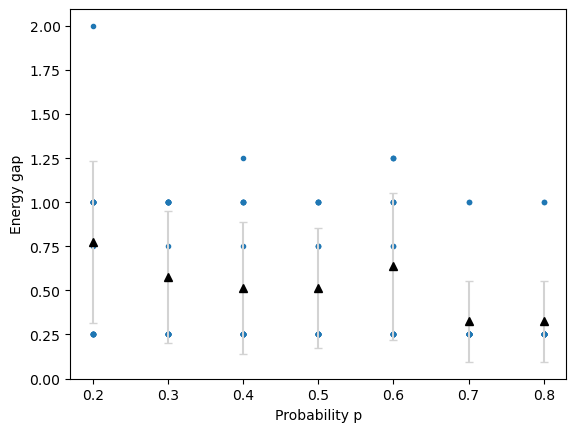

In [19]:
#Plot 1
plt.plot(x,y, '.')
plt.errorbar(p_values, average1, yerr = error1, fmt='^', color='black', ecolor='lightgray', capsize = 3)
plt.xlabel("Probability p")
plt.ylabel("Energy gap")

Text(0, 0.5, 'Number of cut edges')

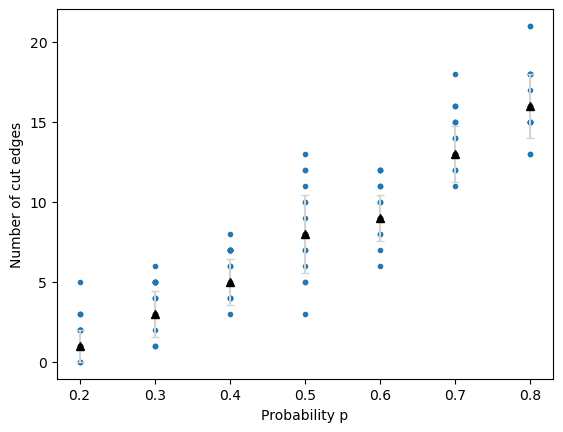

In [20]:
#Plot 2
plt.plot(x,cut_edges, '.')
plt.errorbar(p_values, average2, yerr = error2, fmt='^', color='black', ecolor='lightgray', capsize = 3)
plt.xlabel("Probability p")
plt.ylabel("Number of cut edges")

Text(0, 0.5, 'Number of edges')

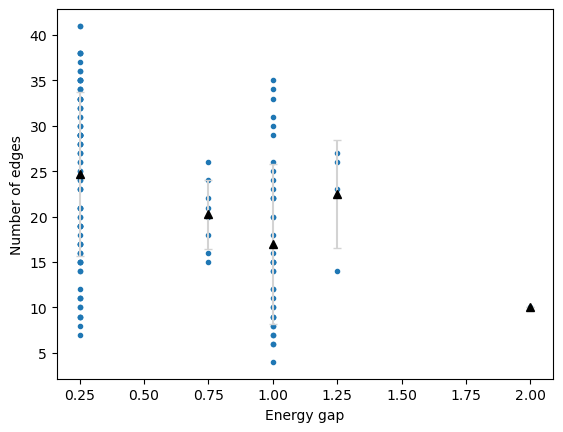

In [21]:
#Plot 3
plt.plot(y, edges, '.')
plt.errorbar(gap_values, average3, yerr = error3, fmt='^', color='black', ecolor='lightgray', capsize = 3)
plt.xlabel("Energy gap")
plt.ylabel("Number of edges")

Let's see what happens if we slightly increase the number of nodes. We now generate 10 random graphs of 15 nodes for different values of p.

In [5]:
#Parameters
n = 15
p_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
alpha = 1.875
beta = 1

In [7]:
#Solving the problem
Egap_list = []
cut_edges_list = []
edges_list = []
average_list1 = []
deviations_list1 = []
average_list2 = []
deviations_list2 = []


for i in p_values:
    Egap_list.append([])
    cut_edges_list.append([])
    
pos = 0
for p in p_values:
    for i in range(10):
        G = RandomGraphGenerator(n, p)
        NetworkToFile(G, "graph2-"+ str(i+1) + "-" + str(p) + ".txt")
        Q =QMatrix("graph2-"+ str(i+1) + "-" + str(p) + ".txt", alpha, beta)
        num_sols, xmin, Egap = QUBOSolution(Q, 1e-2)
        
        aux = []
        for vect in xmin:
            aux.append(NumberCutEdges(vect, G))
        cut_edge_min = np.amin(aux)
        
        Egap_list[pos].append(Egap)
        cut_edges_list[pos].append(cut_edge_min)
        edges_list.append(len(G.edges))
    
    average_list1.append(statistics.mean(Egap_list[pos]))
    deviations_list1.append(statistics.stdev(Egap_list[pos]))
    
    average_list2.append(statistics.mean(cut_edges_list[pos]))
    deviations_list2.append(statistics.stdev(cut_edges_list[pos]))
    pos += 1
    

In [9]:
#Preparing values to be plotted

x = []
for p in p_values:
    for i in range(10):
        x.append(p)
x = np.array(x)

y = []
for i in range(len(p_values)):
    for item in Egap_list[i]:
        y.append(item)
y = np.array(y)

cut_edges = []
for i in range(len(p_values)):
    for item in cut_edges_list[i]:
        cut_edges.append(item)
cut_edges = np.array(cut_edges)

average1 = np.array(average_list1)
error1 = np.array(deviations_list1)

average2 = np.array(average_list2)
error2 = np.array(deviations_list2)

#Edges error and deviation
gap_values = []
for value in y:
    if value not in gap_values:
        gap_values.append(value)
    
edges_sorted = []
for i in gap_values:
    edges_sorted.append([])

for i in range(len(y)):
    j = 0
    for value in gap_values:
        if y[i] == value:
            edges_sorted[j].append(edges_list[i])
            break
        j +=1

average_list3 = []
deviations_list3 = []
for i in range(len(edges_sorted)):
    average_list3.append(statistics.mean(edges_sorted[i]))
    if len(edges_sorted[i]) > 1: 
        deviations_list3.append(statistics.stdev(edges_sorted[i]))
    else:
        deviations_list3.append(0)
    
average3 = np.array(average_list3)
error3 = np.array(deviations_list3)
edges = np.array(edges_list)

Text(0, 0.5, 'Energy gap')

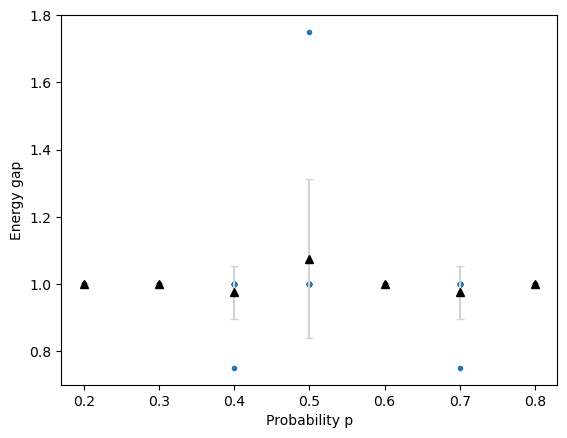

In [10]:
#Plot 1
plt.plot(x,y, '.')
plt.errorbar(p_values, average1, yerr = error1, fmt='^', color='black', ecolor='lightgray', capsize = 3)
plt.xlabel("Probability p")
plt.ylabel("Energy gap")

Text(0, 0.5, 'Number of cut edges')

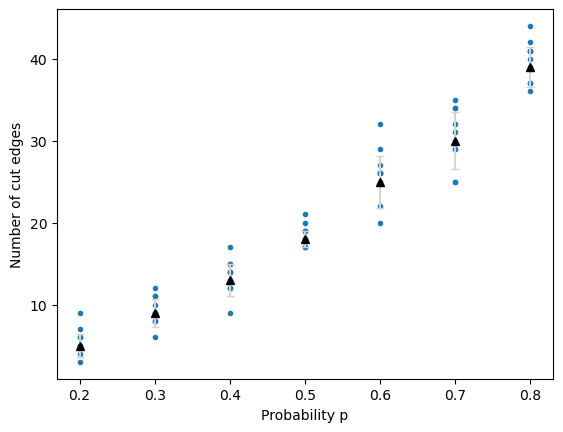

In [11]:
#Plot 2
plt.plot(x,cut_edges, '.')
plt.errorbar(p_values, average2, yerr = error2, fmt='^', color='black', ecolor='lightgray', capsize = 3)
plt.xlabel("Probability p")
plt.ylabel("Number of cut edges")

Text(0, 0.5, 'Number of edges')

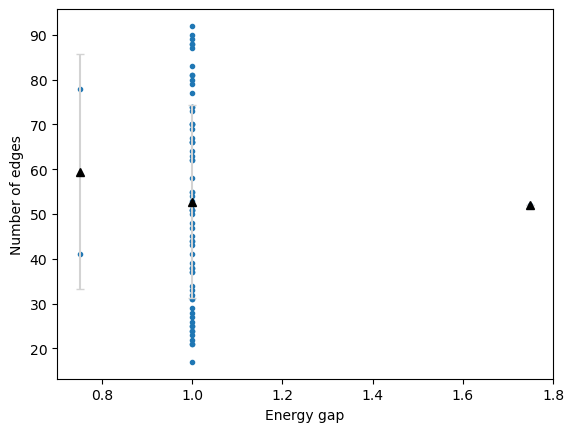

In [12]:
#Plot 3
plt.plot(y, edges, '.')
plt.errorbar(gap_values, average3, yerr = error3, fmt='^', color='black', ecolor='lightgray', capsize = 3)
plt.xlabel("Energy gap")
plt.ylabel("Number of edges")

In [24]:
#Parameters
n = 8
p_values = [0.5, 0.6, 0.7, 0.8]
alpha = 0.625
beta = 1

In [25]:
#Solving the problem
Egap_list = []
cut_edges_list = []
edges_list = []
average_list1 = []
deviations_list1 = []
average_list2 = []
deviations_list2 = []


for i in p_values:
    Egap_list.append([])
    cut_edges_list.append([])
    
pos = 0
for p in p_values:
    for i in range(20):
        G = RandomGraphGenerator(n, p)
        NetworkToFile(G, "graph3-"+ str(i+1) + "-" + str(p) + ".txt")
        Q =QMatrix("graph3-"+ str(i+1) + "-" + str(p) + ".txt", alpha, beta)
        num_sols, xmin, Egap = QUBOSolution(Q, 1e-2)
        
        aux = []
        for vect in xmin:
            aux.append(NumberCutEdges(vect, G))
        cut_edge_min = np.amin(aux)
        
        Egap_list[pos].append(Egap)
        cut_edges_list[pos].append(cut_edge_min)
        edges_list.append(len(G.edges))
    
    average_list1.append(statistics.mean(Egap_list[pos]))
    deviations_list1.append(statistics.stdev(Egap_list[pos]))
    
    average_list2.append(statistics.mean(cut_edges_list[pos]))
    deviations_list2.append(statistics.stdev(cut_edges_list[pos]))
    pos += 1
    

In [26]:
#Preparing values to be plotted

x = []
for p in p_values:
    for i in range(20):
        x.append(p)
x = np.array(x)

y = []
for i in range(len(p_values)):
    for item in Egap_list[i]:
        y.append(item)
y = np.array(y)

cut_edges = []
for i in range(len(p_values)):
    for item in cut_edges_list[i]:
        cut_edges.append(item)
cut_edges = np.array(cut_edges)

average1 = np.array(average_list1)
error1 = np.array(deviations_list1)

average2 = np.array(average_list2)
error2 = np.array(deviations_list2)

#Edges error and deviation
gap_values = []
for value in y:
    if value not in gap_values:
        gap_values.append(value)
    
edges_sorted = []
for i in gap_values:
    edges_sorted.append([])

for i in range(len(y)):
    j = 0
    for value in gap_values:
        if y[i] == value:
            edges_sorted[j].append(edges_list[i])
            break
        j +=1

average_list3 = []
deviations_list3 = []
for i in range(len(edges_sorted)):
    average_list3.append(statistics.mean(edges_sorted[i]))
    if len(edges_sorted[i]) > 1: 
        deviations_list3.append(statistics.stdev(edges_sorted[i]))
    else:
        deviations_list3.append(0)
    
average3 = np.array(average_list3)
error3 = np.array(deviations_list3)
edges = np.array(edges_list)

Text(0, 0.5, 'Energy gap')

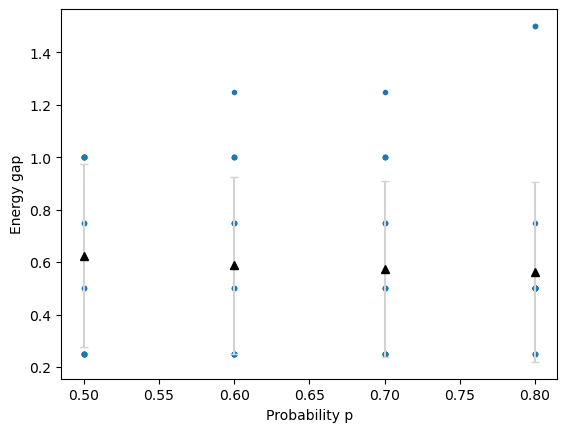

In [27]:
#Plot 1
plt.plot(x,y, '.')
plt.errorbar(p_values, average1, yerr = error1, fmt='^', color='black', ecolor='lightgray', capsize = 3)
plt.xlabel("Probability p")
plt.ylabel("Energy gap")

Text(0, 0.5, 'Number of cut edges')

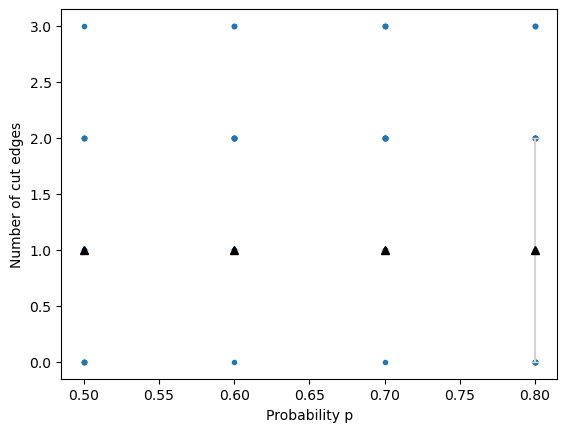

In [28]:
#Plot 2
plt.plot(x,cut_edges, '.')
plt.errorbar(p_values, average2, yerr = error2, fmt='^', color='black', ecolor='lightgray', capsize = 3)
plt.xlabel("Probability p")
plt.ylabel("Number of cut edges")

Text(0, 0.5, 'Number of edges')

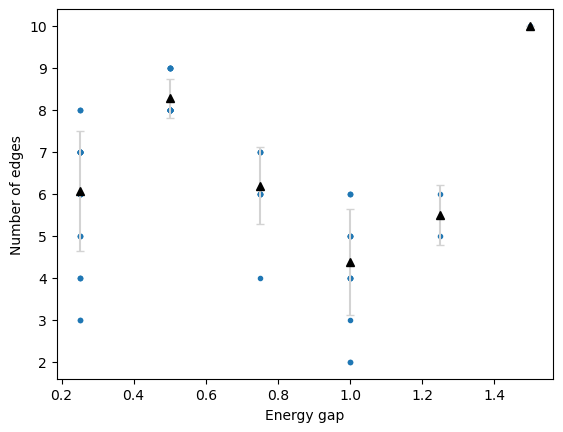

In [29]:
#Plot 3
plt.plot(y, edges, '.')
plt.errorbar(gap_values, average3, yerr = error3, fmt='^', color='black', ecolor='lightgray', capsize = 3)
plt.xlabel("Energy gap")
plt.ylabel("Number of edges")